In [1]:
import os
from collections import Counter
from itertools import cycle

os.environ['CUDA_VISIBLE_DEVICES'] = ''

import keras.backend as K
import matplotlib.pyplot as plt
import numpy as np
from abyss_deep_learning.utils import detile, tile_gen
# from numpy.lib.stride_tricks import as_strided as ast
from skimage.color import rgb2gray

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [291]:

#### Generic Algorithms

class LRSearch(object):
    def __init__(self, model, x, y=None, batch_size=None):
        self.model = model
        self.results = {'final_loss': dict(), 'improvement': dict(), 'history': dict(), 'epochs': dict()}
        self.inputs = x
        self.targets = y
        self.batch_size = batch_size
        if not model.built:
            raise ValueError("Model must be compiled first.")
        self.weights = self.model.get_weights()
        
    def fit(self, n_lrs=10, n_epochs=1, lr_power_range=(-5, -2), **kwargs):
        from types import GeneratorType
        from keras.callbacks import TerminateOnNaN
        kwargs['callbacks'] = [TerminateOnNaN()]
        for learning_rate in 10 ** np.random.uniform(lr_power_range[0], lr_power_range[1], n_lrs):
            print("Starting LR {:e}".format(learning_rate))
            self.model.reset_states()
            self.model.set_weights(self.weights)
            K.set_value(self.model.optimizer.lr, learning_rate)
            if isinstance(self.inputs, GeneratorType):
                result = self.model.fit_generator(
                    self.inputs, epochs=n_epochs, verbose=0, **kwargs)
            else:
                result = self.model.fit(
                    self.inputs, self.targets, batch_size=self.batch_size, epochs=n_epochs, verbose=0, **kwargs)
            self.results['final_loss'][float(learning_rate)] = result.history['loss'][-1]
            self.results['improvement'][float(learning_rate)] = result.history['loss'][-1] - result.history['loss'][0]
            self.results['history'][float(learning_rate)] = result.history['loss']
            self.results['epochs'][float(learning_rate)] = result.epoch
            
    
    def plot(self):
        if self.model.optimizer == 'categorical_crossentropy'
        rand_loss = -np.log(1 / y_gt.shape[1])

        x, y = list(self.results['final_loss'].keys()), list(self.results['final_loss'].values())
        plt.figure()
        fig, ax1 = plt.subplots()
        ax1.semilogx(x, 100 * (1 - y / rand_loss), 'x')

        ax1.grid(True)
        ax1.set_ylabel('final loss (% better than rand)')
        ax1.tick_params('y')
        ax1.set_xlabel("learning rate")
        ax1.set_ylim([-50, 100])

SyntaxError: invalid syntax (<ipython-input-291-71994d318da4>, line 37)

In [290]:
search.model.loss

'categorical_crossentropy'

In [275]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.datasets import load_digits
x_gt, y_gt = load_digits(return_X_y=True)
StandardScaler(copy=False).fit_transform(x_gt)
shuf_idx = np.arange(x_gt.shape[0])[:100]
np.random.shuffle(shuf_idx)
x_gt = np.random.normal(x_gt[shuf_idx, :], 0.333)
y_gt = OneHotEncoder(n_values=10, sparse=False).fit_transform(y_gt[shuf_idx].reshape(-1, 1))
print(x_gt.shape, y_gt.shape)
print(np.min(x_gt), np.max(x_gt))
print(y_gt[0, :])

(100, 64) (100, 10)
-3.30641728975669 29.477298773180898
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 64)                0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 8, 8, 1)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 2)           20        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 4)           76        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 8)           296       
_________________________________________________________________
global_average_pooling2d_1 ( (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                90        
Total para

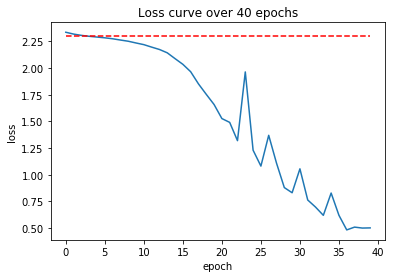

In [276]:
from keras.models import Model
from keras.layers import Dense, Input, Conv2D, Reshape, GlobalAveragePooling2D
import keras.backend as K
from keras.optimizers import SGD

def create_model(input_shape, output_dim, learning_rate, optimiser=SGD):
    x0 = Input(shape=input_shape, name='input')
    x = Reshape((8, 8, 1))(x0)
    x = Conv2D(2, 3, activation='relu')(x)
    x = Conv2D(4, 3, activation='relu')(x)
    x = Conv2D(8, 3, activation='relu')(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(output_dim, activation='softmax')(x)
    model = Model(x0, x)
    model.compile(
        optimiser(lr=learning_rate), 'categorical_crossentropy',
        metrics=['categorical_accuracy'])
    return model

def test_model(learning_rate, epochs=40):
    model = None
    K.clear_session()
    model = create_model(
        input_shape=x_gt.shape[1:], output_dim=y_gt.shape[-1], learning_rate=learning_rate)
    model.summary()
    history = model.fit(x_gt, y_gt, epochs=epochs, verbose=2)
    plt.figure()
    plt.plot(history.epoch, history.history['loss'])
    plt.plot(history.epoch, np.ones_like(history.epoch) * -np.log(1/y_gt.shape[1]), 'r--')
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title("Loss curve over {:d} epochs".format(epochs))
    return history

test_model(learning_rate=1e-1);

In [277]:
model = None
K.clear_session()
model = create_model(input_shape=x_gt.shape[1:], output_dim=y_gt.shape[1], learning_rate=0.01)

search = LRSearch(model, x_gt, y_gt, batch_size=32)


In [288]:
search.fit(n_lrs=20, n_epochs=15, lr_power_range=(-4, 2))

Starting LR 1.258718e-01
Starting LR 8.147884e-02
Starting LR 5.597492e-01
Starting LR 6.272295e-01
Starting LR 8.228154e-04
Starting LR 2.731174e+00
Starting LR 1.853203e+01
Starting LR 1.530596e-04
Starting LR 5.047753e+01
Starting LR 3.531073e-01
Starting LR 9.506012e+01
Starting LR 1.256849e-04
Starting LR 4.354772e+01
Starting LR 1.956019e+01
Starting LR 4.825336e+01
Starting LR 3.448998e-04
Starting LR 5.328747e-02
Starting LR 3.322767e-02
Starting LR 8.366597e-01
Starting LR 8.033994e+01


<Figure size 432x288 with 0 Axes>

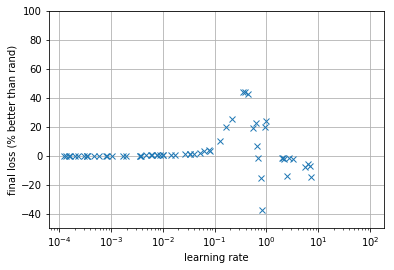

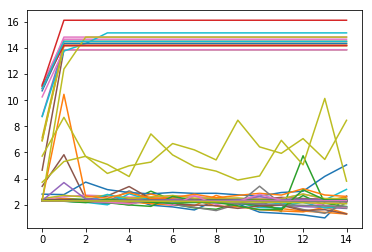

In [289]:
search.plot()